In [29]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-paper')


In [30]:
recurringData = pd.read_csv("DonorDataSets/active_recurring donations.csv", index_col="Account ID") # uses Account ID as index

In [31]:
recurringData.tail(10)
print("Last 10 Data")

Last 10 Data


In [32]:
recurringData.columns # returns columns in the Dataset

Index(['Recurring Donation ID', 'Recurring Donation Amount',
       'Recurring Donation Interval', 'Recurring Donation Unit',
       'Recurring Donation End Date', 'Recurring Donation Next Payment Date',
       'Recurring Donation Status', 'Total Amount', 'Donation Count',
       'Full Name (F)', 'Company Name', 'Unnamed: 12'],
      dtype='object')

In [33]:
recurringData.columns[recurringData.isna().any()].tolist() # Checks which columns have NaN 

['Recurring Donation End Date', 'Company Name', 'Unnamed: 12']

In [34]:
# Drops columns based on relevancy and in order to treat NaN values
recurringData.drop(['Recurring Donation End Date', 'Company Name', 'Unnamed: 12'], axis = 1 , inplace=True) 

In [35]:
recurringData.columns

Index(['Recurring Donation ID', 'Recurring Donation Amount',
       'Recurring Donation Interval', 'Recurring Donation Unit',
       'Recurring Donation Next Payment Date', 'Recurring Donation Status',
       'Total Amount', 'Donation Count', 'Full Name (F)'],
      dtype='object')

In [36]:
recurringData.columns[recurringData.isna().any()].tolist() # Checks which columns have NaN 


[]

In [37]:
recurringData.tail(5)

,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Unit,Recurring Donation Next Payment Date,Recurring Donation Status,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,,,
1191,48,12.0,1,MONTH,11/13/2024,Active,127.10,10,Donn Gasner
1175,49,100.0,1,MONTH,11/22/2024,Active,942.21,9,Jenny Badreddine
2319,51,20.0,1,MONTH,11/22/2024,Active,188.73,9,Karen Ingmundson
5531,52,25.0,1,MONTH,11/22/2024,Active,225.00,9,SARAH MILLER
2505,53,100.0,1,MONTH,11/12/2024,Active,207.20,2,Chris & Amy Guthrie


In [38]:
recurringData.drop(['Recurring Donation Unit'], axis = 1, inplace= True) # Irrelevant Column, so drops it
recurringData.drop('Recurring Donation Status', axis = 1, inplace=True)

In [39]:
recurringData.head(10)

,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Next Payment Date,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,
102,1,12.0,1,11/11/2024,804.00,67,Ashley Locke
306,7,25.0,1,11/02/2024,"1,275.00",51,Paul Schwartz
316,8,25.0,1,11/10/2024,"1,275.00",51,Holly Lyon
321,9,12.0,1,11/10/2024,682.38,51,Lisa Olmsted
337,11,12.0,1,11/11/2024,648.21,51,Jonathon Vinje
367,12,25.0,1,11/21/2024,"1,306.50",50,Leah Roe
372,13,25.0,1,11/21/2024,"1,306.50",50,Nicole Kavanaugh
1194,17,25.0,1,10/25/2024,"1,151.04",44,Ruth Hann
1256,18,25.0,3,11/25/2024,391.95,15,Jerry Sander


In [40]:
recurringData.columns

Index(['Recurring Donation ID', 'Recurring Donation Amount',
       'Recurring Donation Interval', 'Recurring Donation Next Payment Date',
       'Total Amount', 'Donation Count', 'Full Name (F)'],
      dtype='object')

In [41]:
recurringData['Recurring Donation Next Payment Date'] # Prints the column

Account ID
102     11/11/2024
306     11/02/2024
316     11/10/2024
321     11/10/2024
337     11/11/2024
367     11/21/2024
372     11/21/2024
1194    10/25/2024
1256    11/25/2024
1934    10/25/2024
2296    10/25/2024
2486    10/27/2024
2507    11/21/2024
2505    11/12/2024
225     11/07/2024
2613    11/12/2024
2632    11/10/2024
2731    11/17/2024
2849    11/20/2024
3415    10/24/2024
375     10/24/2024
3373    10/28/2024
2186    10/23/2024
642     11/14/2024
3520    10/23/2024
78      10/23/2024
2670    11/04/2024
5853    11/19/2024
5863    11/14/2024
478     10/24/2024
1191    11/13/2024
1175    11/22/2024
2319    11/22/2024
5531    11/22/2024
2505    11/12/2024
Name: Recurring Donation Next Payment Date, dtype: object

In [42]:
recurringData['Full Name (F)'].value_counts(dropna=False) # Checks occurrence of same Donor

Full Name (F)
Chris & Amy Guthrie       2
Ashley Locke              1
Paul Schwartz             1
Holly Lyon                1
Jonathon Vinje            1
Lisa Olmsted              1
Nicole Kavanaugh          1
Ruth Hann                 1
Jerry Sander              1
Leah Roe                  1
Cynthia Terrill           1
Dennis & Denise Babish    1
Joyce Felstehausen        1
Elizabeth Ireland         1
Amanda Stein              1
Amanda Weppler Ansel      1
William Janson            1
Susan Junk                1
Susan Lutter              1
Judith Taritas            1
Katharine Rossing         1
Leah Schrader             1
Susan Felstehausen        1
Lori Hessefort            1
Jill L Fisher             1
Donna Sollenberger        1
William Holloway          1
Barbara Ingham            1
Caleb Cox                 1
Paul Carstens             1
Donn Gasner               1
Jenny Badreddine          1
Karen Ingmundson          1
SARAH MILLER              1
Name: count, dtype: int64

In [43]:
recurringData[recurringData['Full Name (F)'] == 'Chris & Amy Guthrie'].index # Checks Account ID for the given donor

Index([2505, 2505], dtype='int64', name='Account ID')

In [44]:
recurringData.sort_values('Recurring Donation Amount', inplace=True, ascending=False) 
recurringData.head(10)

,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Next Payment Date,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,
78,43,200.0,1,10/23/2024,"4,000.00",20,Donna Sollenberger
2632,30,100.0,1,11/10/2024,"3,522.40",34,William Janson
2505,53,100.0,1,11/12/2024,207.20,2,Chris & Amy Guthrie
5853,45,100.0,1,11/19/2024,"1,431.78",14,Barbara Ingham
1175,49,100.0,1,11/22/2024,942.21,9,Jenny Badreddine
2505,27,100.0,1,11/12/2024,"3,729.60",36,Chris & Amy Guthrie
2849,34,75.0,3,11/20/2024,856.46,11,Susan Lutter
2507,26,50.0,1,11/21/2024,"2,310.00",44,Elizabeth Ireland
2613,29,50.0,1,11/12/2024,"1,820.35",35,Amanda Weppler Ansel


In [45]:
print(recurringData['Recurring Donation Amount'].describe()) # Prints general Stats for the given column

count     35.000000
mean      42.257143
std       40.049486
min       12.000000
25%       25.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: Recurring Donation Amount, dtype: float64


Recurring Donation Amount Rundown:

count     35.000000
mean      42.257143
std       40.049486
min       12.000000
25%       25.000000
50%       25.000000
75%       50.000000
max      200.000000

In [46]:
recurringData['Total Amount'].describe()

count           35
unique          32
top       2,310.00
freq             2
Name: Total Amount, dtype: object

In [47]:
recurringData.dtypes

Recurring Donation ID                     int64
Recurring Donation Amount               float64
Recurring Donation Interval               int64
Recurring Donation Next Payment Date     object
Total Amount                             object
Donation Count                            int64
Full Name (F)                            object
dtype: object

In [48]:
recurringData['Total Amount'] = recurringData['Total Amount'].replace('[\$,]', '', regex=True).astype(float) # Converts Object into float

In [49]:
recurringData['Total Amount'].describe()

count      35.000000
mean     1119.330571
std       982.582354
min       127.100000
25%       464.960000
50%       856.460000
75%      1290.750000
max      4000.000000
Name: Total Amount, dtype: float64

Total Donation Amount Rundown:

count      35.000000
mean     1119.330571
std       982.582354
min       127.100000
25%       464.960000
50%       856.460000
75%      1290.750000
max      4000.000000


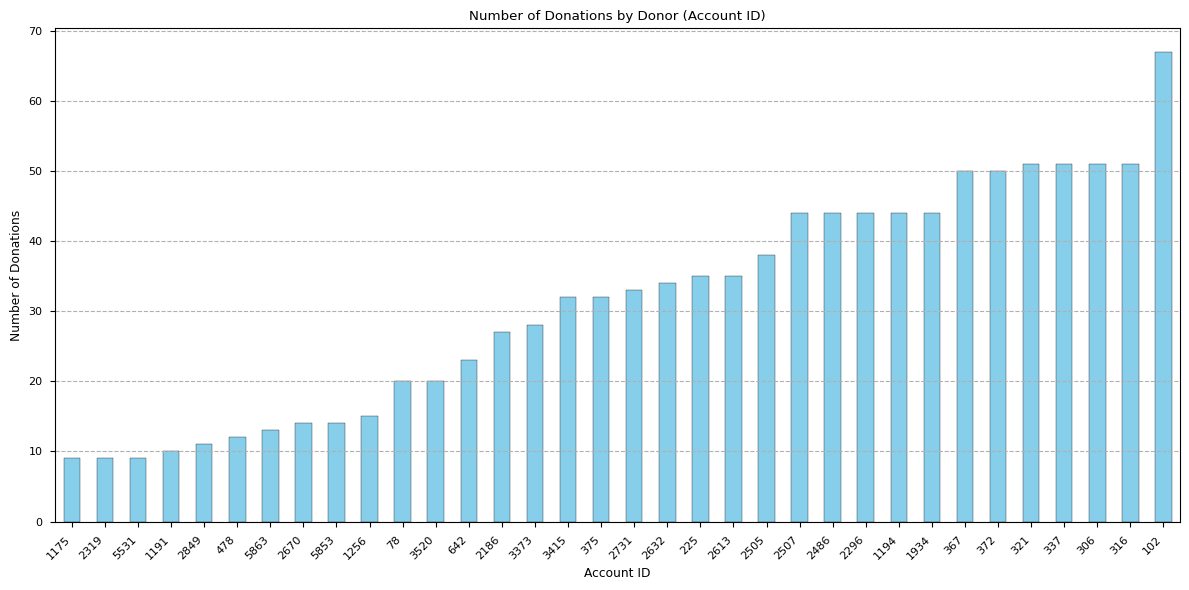

In [50]:
donation_counts = (recurringData.groupby(recurringData.index)['Donation Count'].sum()).sort_values()

plt.figure(figsize=(12, 6))
donation_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Donations by Donor (Account ID)')
plt.xlabel('Account ID')
plt.ylabel('Number of Donations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--')  # Optional: add a grid for better readability
plt.show()


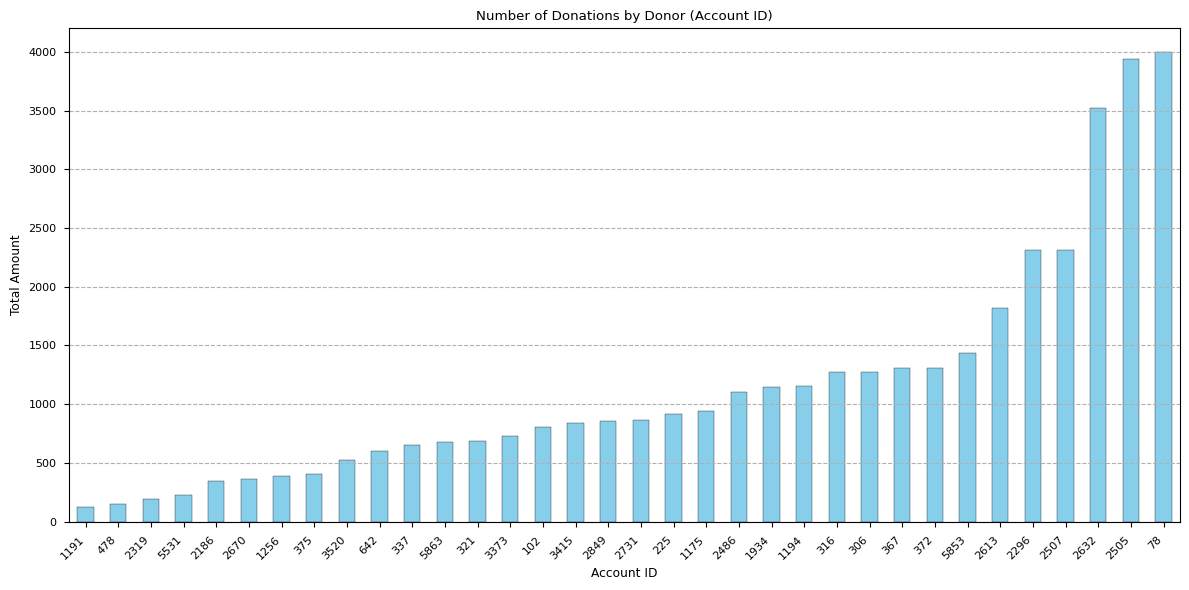

In [51]:
total_amount = (recurringData.groupby(recurringData.index)['Total Amount'].sum()).sort_values()

plt.figure(figsize=(12, 6))
total_amount.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Donations by Donor (Account ID)')
plt.xlabel('Account ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--')  # Optional: add a grid for better readability
plt.show()

In [ ]:
recurringData.to_csv('CleanedDonorsDataSets/recurringDataCleaned.csv', index=True) 


In [53]:
allDonors = pd.read_csv('DonorDataSets/all_donors.csv', index_col='Account ID')

In [54]:
allDonors.head(10)

,Account Type,Salutation,Full Name (F),Company Name,Address Line 1,City,State/Province,Zip Code,Largest Donation Amount,Unnamed: 10
Account ID,,,,,,,,,,
7458,Company,NaN,NaN,JLA Architects,800 West Broadway,Monona,WI,53713,"10,000.00",NaN
98,Company,NaN,NaN,Toot + Kate's Winebar,NaN,NaN,NaN,NaN,200.00,NaN
7610,Company,NaN,NaN,American Transmission Company,W234 N2000 Ridgeview Pkwy Ct.,Waukesha,WI,53187,50.00,NaN
7463,Company,NaN,NaN,Dental Health Associates of Madison LTD.,2971 Chapel Valley Rd.,Madison,WI,53711,"2,500.00",NaN
267,Company,NaN,NaN,American Family Insurance Dreams Foundation,NaN,NaN,NaN,NaN,150.00,NaN
119,Company,NaN,NaN,Kendra Scott,NaN,NaN,NaN,NaN,22.00,NaN
175,Company,NaN,NaN,C.H. Robinson,4009 Felland Rd,Madison,WI,53718,250.00,NaN
266,Company,NaN,NaN,TASC Employee Philanthropy Committee,2302 International Ln,Madison,WI,53794,"3,500.00",NaN
2578,Company,NaN,NaN,YourCause,65 Fairchild St.,Charleston,SC,29492,120.00,NaN


In [55]:
allDonors.columns

Index(['Account Type', 'Salutation', 'Full Name (F)', 'Company Name',
       'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Largest Donation Amount', 'Unnamed: 10'],
      dtype='object')

In [56]:
allDonors.drop(columns=['Salutation', 'Address Line 1', 'Unnamed: 10'], inplace=True)

In [57]:
allDonors.columns

Index(['Account Type', 'Full Name (F)', 'Company Name', 'City',
       'State/Province', 'Zip Code', 'Largest Donation Amount'],
      dtype='object')

In [58]:
allDonors.columns[allDonors.isna().any()].to_list()

['Full Name (F)', 'Company Name', 'City', 'State/Province', 'Zip Code']

In [59]:
allDonors['Full Name (F)'].value_counts(dropna=False)

Full Name (F)
NaN                    28
Megan Sollenberger      9
Anonymous Anonymous     7
Matt Kinney             3
Mary Doran              3
                       ..
Alicia Zweifel          1
Kathie Zwettler         1
Marjorie Zwickel        1
Mark Zwolski            1
Rich Zellmer            1
Name: count, Length: 4781, dtype: int64

In [60]:
allDonors['Company Name'].value_counts(dropna=False)

Company Name
NaN                                            4478
Retired                                          22
Epic                                             19
American Family Insurance                        13
J.H. Findorff & Son Inc.                          8
                                               ... 
American Family Insurance Dreams Foundation       1
Dental Health Associates of Madison LTD.          1
American Transmission Company                     1
Toot + Kate's Winebar                             1
Nevada Bobs Madison                               1
Name: count, Length: 360, dtype: int64

In [61]:
allDonors['City'].value_counts(dropna=False)

City
NaN            2755
Madison         688
Middleton       124
Sun Prairie     109
Verona          108
               ... 
Neenah            1
Cincinnati        1
DARLINGTON        1
Mequon            1
PLATTEVILLE       1
Name: count, Length: 263, dtype: int64

In [62]:
allDonors['State/Province'].value_counts(dropna=False)

State/Province
NaN    2754
WI     2199
TX        7
NY        7
FL        6
CA        5
MN        5
MA        4
IL        4
SC        3
WA        3
OH        2
VA        2
GA        1
TN        1
DC        1
PA        1
NJ        1
MO        1
DE        1
Name: count, dtype: int64

In [63]:
allDonors['State/Province'].value_counts(dropna=False)

State/Province
NaN    2754
WI     2199
TX        7
NY        7
FL        6
CA        5
MN        5
MA        4
IL        4
SC        3
WA        3
OH        2
VA        2
GA        1
TN        1
DC        1
PA        1
NJ        1
MO        1
DE        1
Name: count, dtype: int64

In [64]:
allDonors['Zip Code'].value_counts(dropna=False)

Zip Code
53711                   375
53590                   289
53704                   269
53562                   249
53593                   239
                       ... 
85338                     1
53559-9103                1
53590852914993851847      1
53574-9454                1
53187                     1
Name: count, Length: 501, dtype: int64

In [65]:
allDonorsClean = allDonors.dropna(subset=['Full Name (F)', 'Company Name', 'City', 'State/Province', 'Zip Code']) #Drops rows with NaN Values for the given columns

In [66]:
allDonorsClean.head(10)

,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount
Account ID,,,,,,,
177,Company,Nordic Consulting Partners,Nordic Consulting Partners,Madison,WI,53713,500.00
1598,Individual,Ralph A Meyer,Ralph A Meyer,"Montfort,",WI,53569,51.85
6484,Individual,Robert Acker,Robert Acker,Waunakee,WI,53597,26.16
5935,Individual,Rhonda Adams,The River Food Pantry,Madison,WI,53718,250.00
398,Individual,David Aguero,St. Jude Children's Research Hospital,Memphis,TN,38117,26.06
5932,Company,Dean C Allen,McKinstry Charitabe Foundation,Seattle,WA,98134,600.00
6190,Individual,Rob and Jenny Baerwolf,Baerwolf Dairies LLC,Sun Prairie,WI,53590-9654,26.13
5146,Individual,Aimee Bailey,Veridian Homes Foundation,Oregon,WI,53575,100.00
5928,Company,Diane Ballweg,Endres Manufacturing Co. Foundation,Madison,WI,53703,"5,000.00"


In [67]:
# Treating city names with different in sequences of literals
allDonorsClean['City'] = allDonorsClean['City'].str.title().str.strip()
allDonorsClean['City'] = allDonorsClean['City'].replace('[\$,]', '', regex=True) 


C:\Users\prate\AppData\Local\Temp\ipykernel_14860\3309086770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDonorsClean['City'] = allDonorsClean['City'].str.title().str.strip()
C:\Users\prate\AppData\Local\Temp\ipykernel_14860\3309086770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDonorsClean['City'] = allDonorsClean['City'].replace('[\$,]', '', regex=True)


In [68]:
allDonorsClean['State/Province'].unique() # Checks for unique states in the data set

array(['WI', 'TN', 'WA', 'MA', 'GA', 'NY', 'SC', 'IL', 'VA', 'MN', 'FL',
       'DE', 'TX', 'OH'], dtype=object)

In [69]:
allDonorsClean['Largest Donation Amount'] = allDonorsClean['Largest Donation Amount'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\prate\AppData\Local\Temp\ipykernel_14860\2353345567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDonorsClean['Largest Donation Amount'] = allDonorsClean['Largest Donation Amount'].replace('[\$,]', '', regex=True).astype(float)


In [70]:
allDonorsClean.dtypes

Account Type                object
Full Name (F)               object
Company Name                object
City                        object
State/Province              object
Zip Code                    object
Largest Donation Amount    float64
dtype: object

In [71]:
allDonorsClean.tail(10)

,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount
Account ID,,,,,,,
7450,Individual,Bryan Wierwill,Self,Verona,WI,53593,52.01
174,Company,Julie Wilson,Mount Horeb United Methodist Church,Mount Horeb,WI,53572,200.00
7099,Individual,Julie Wilson,Mount Horeb United Methodist Church,Madison,WI,53719,51.96
7607,Individual,John Wineke,East Madison Toyota,Sun Prairie,WI,53590,260.00
1766,Individual,Ed & Kathy Wirka,Other,Madison,WI,53711,103.60
4980,Individual,Michelle Witt,CUNA Mutual Group,Madison,WI,53719,150.00
5874,Individual,Jessica Yehle,LCEC Volunteer,Madison,WI,53717,10000.00
2535,Individual,Jodi Zander,Allure Skin Health LLC,Sun Prairie,WI,53590,260.46
5652,Individual,Kevin & Colleen Zimmerman,KCJ Angus,Platteville,WI,53818,26.13


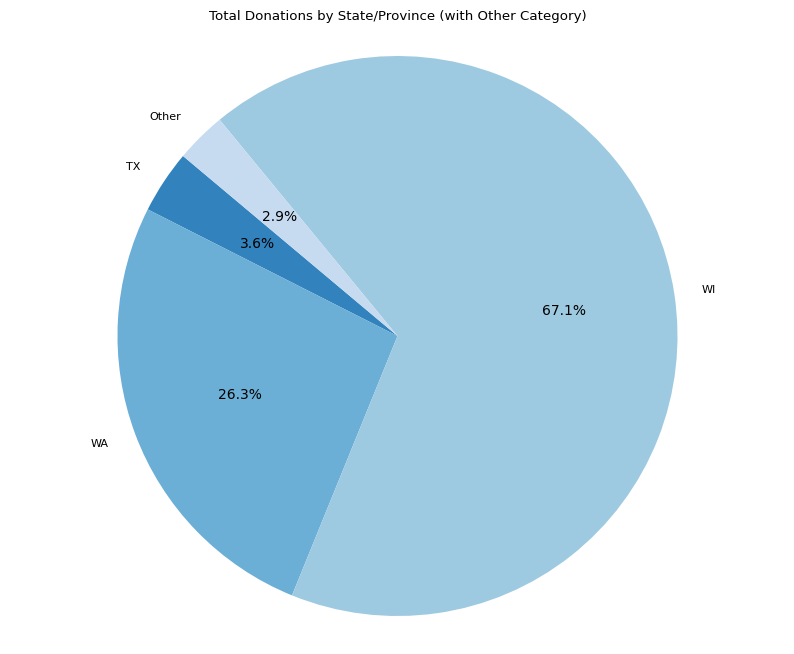

In [72]:
state_donations = allDonorsClean.groupby('State/Province')['Largest Donation Amount'].sum()

# Define a threshold for combining smaller donations
threshold = state_donations.sum() * 0.02  # Example: Combine states that contribute less than 5% of total donations

# Separate states above the threshold and combine the rest into 'Other'
donations_above_threshold = state_donations[state_donations >= threshold]
other_donations = state_donations[state_donations < threshold].sum()

# Create a new Series with 'Other' category
# Create a new Series with 'Other' category
donations_to_plot = pd.concat([donations_above_threshold, pd.Series({'Other': other_donations})])

# Create a pie chart for total donation amounts by state/province
plt.figure(figsize=(10, 8))
plt.pie(donations_to_plot, labels=donations_to_plot.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title('Total Donations by State/Province (with Other Category)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
allDonorsClean.to_csv('CleanedDonorsDataSets/allConorsClean.csv', index = True)

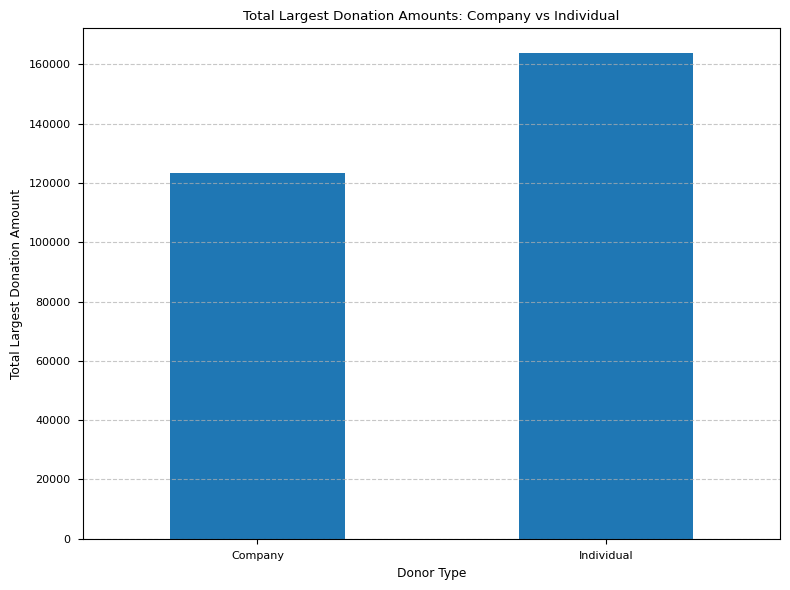

In [74]:
donation_type = allDonorsClean.groupby('Account Type')['Largest Donation Amount'].sum()

plt.figure(figsize=(8, 6))
donation_type.plot(kind='bar')
plt.title('Total Largest Donation Amounts: Company vs Individual')
plt.xlabel('Donor Type')
plt.ylabel('Total Largest Donation Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

In [75]:
allDonorsWI = allDonorsClean[allDonorsClean['State/Province'] == "WI"] # Making a separate dataset specific to Wisconsin
allDonorsWI

,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount
Account ID,,,,,,,
177,Company,Nordic Consulting Partners,Nordic Consulting Partners,Madison,WI,53713,500.00
1598,Individual,Ralph A Meyer,Ralph A Meyer,Montfort,WI,53569,51.85
6484,Individual,Robert Acker,Robert Acker,Waunakee,WI,53597,26.16
5935,Individual,Rhonda Adams,The River Food Pantry,Madison,WI,53718,250.00
6190,Individual,Rob and Jenny Baerwolf,Baerwolf Dairies LLC,Sun Prairie,WI,53590-9654,26.13
...,...,...,...,...,...,...,...
4980,Individual,Michelle Witt,CUNA Mutual Group,Madison,WI,53719,150.00
5874,Individual,Jessica Yehle,LCEC Volunteer,Madison,WI,53717,10000.00
2535,Individual,Jodi Zander,Allure Skin Health LLC,Sun Prairie,WI,53590,260.46


In [76]:
allDonorsWI['City'].unique()

array(['Madison', 'Montfort', 'Waunakee', 'Sun Prairie', 'Oregon',
       'Middleton', 'Cambridge', 'Cottage Grove', 'Whitefish Bay',
       'Verona', 'Monona', 'Poynette', 'Orfordville', 'Janesville',
       'Deforest', 'Marshall', 'Spring Green', 'Mcfarland', 'Sauk City',
       'Prairie Du Sac', 'Potosi', 'Sun Prairie Wi', '53711',
       'Briggsville', 'Fitchburg', 'Edgerton', 'Deerfield',
       'Cross Plains', 'Evansville', 'Milwaukee', 'Richland Ctr',
       'Monroe', 'Cambria', 'De Forest', 'Belleville', 'Juneau',
       'Mount Horeb', 'Black Earth', 'Avalon', 'Madisin', 'Watertown',
       'Reedsburg', 'Waukesha Wisconsin Ee. Uu.', 'Lodi', 'Baraboo',
       'Verona Wi', 'Blanchardville', 'Brooklyn', 'Albany', 'Palmyra',
       'Barneveld', 'Oak Creek', 'Rhinelander', 'Oconomowoc', 'Beloit',
       'Lake Mills', 'New Glarus', 'Milton', 'Windsor', 'Menomonee Falls',
       'Stoughton', 'Mc Farland', 'Platteville'], dtype=object)

In [77]:
allDonorsWI['City'].value_counts

<bound method IndexOpsMixin.value_counts of Account ID
177         Madison
1598       Montfort
6484       Waunakee
5935        Madison
6190    Sun Prairie
           ...     
4980        Madison
5874        Madison
2535    Sun Prairie
5652    Platteville
7388        Madison
Name: City, Length: 267, dtype: object>

In [78]:
allDonorsWI['Largest Donation Amount'] = allDonorsWI['Largest Donation Amount'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\prate\AppData\Local\Temp\ipykernel_14860\3531750461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDonorsWI['Largest Donation Amount'] = allDonorsWI['Largest Donation Amount'].replace('[\$,]', '', regex=True).astype(float)


In [79]:
allDonorsWI

,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount
Account ID,,,,,,,
177,Company,Nordic Consulting Partners,Nordic Consulting Partners,Madison,WI,53713,500.00
1598,Individual,Ralph A Meyer,Ralph A Meyer,Montfort,WI,53569,51.85
6484,Individual,Robert Acker,Robert Acker,Waunakee,WI,53597,26.16
5935,Individual,Rhonda Adams,The River Food Pantry,Madison,WI,53718,250.00
6190,Individual,Rob and Jenny Baerwolf,Baerwolf Dairies LLC,Sun Prairie,WI,53590-9654,26.13
...,...,...,...,...,...,...,...
4980,Individual,Michelle Witt,CUNA Mutual Group,Madison,WI,53719,150.00
5874,Individual,Jessica Yehle,LCEC Volunteer,Madison,WI,53717,10000.00
2535,Individual,Jodi Zander,Allure Skin Health LLC,Sun Prairie,WI,53590,260.46


In [80]:
allDonorsWI['Largest Donation Amount'].describe()

count      267.000000
mean       721.919625
std       2631.057269
min          0.000000
25%         50.000000
50%        103.300000
75%        300.000000
max      30000.000000
Name: Largest Donation Amount, dtype: float64

In [81]:
allDonorsWI['City'] = allDonorsWI['City'].str.title().str.strip()

C:\Users\prate\AppData\Local\Temp\ipykernel_14860\2120168512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDonorsWI['City'] = allDonorsWI['City'].str.title().str.strip()


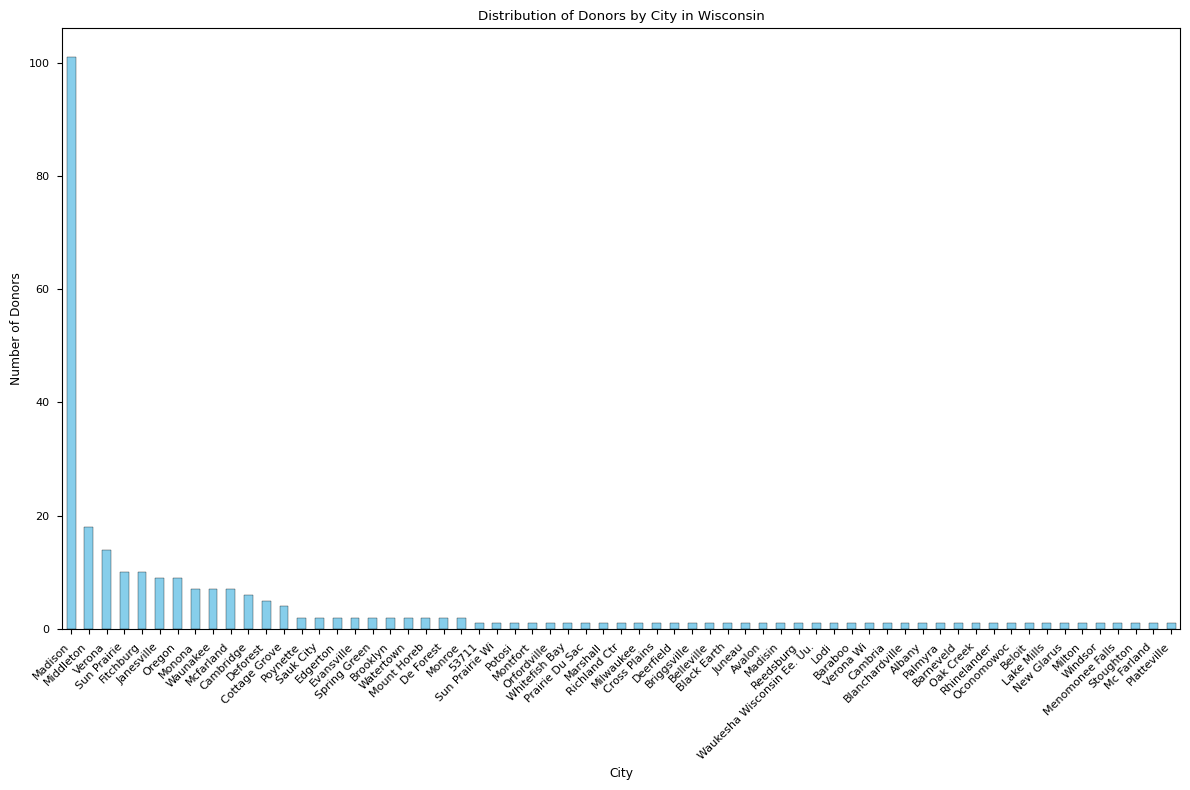

In [82]:
city_counts = allDonorsWI['City'].value_counts()
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Donors by City in Wisconsin')
plt.xlabel('City')
plt.ylabel('Number of Donors')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

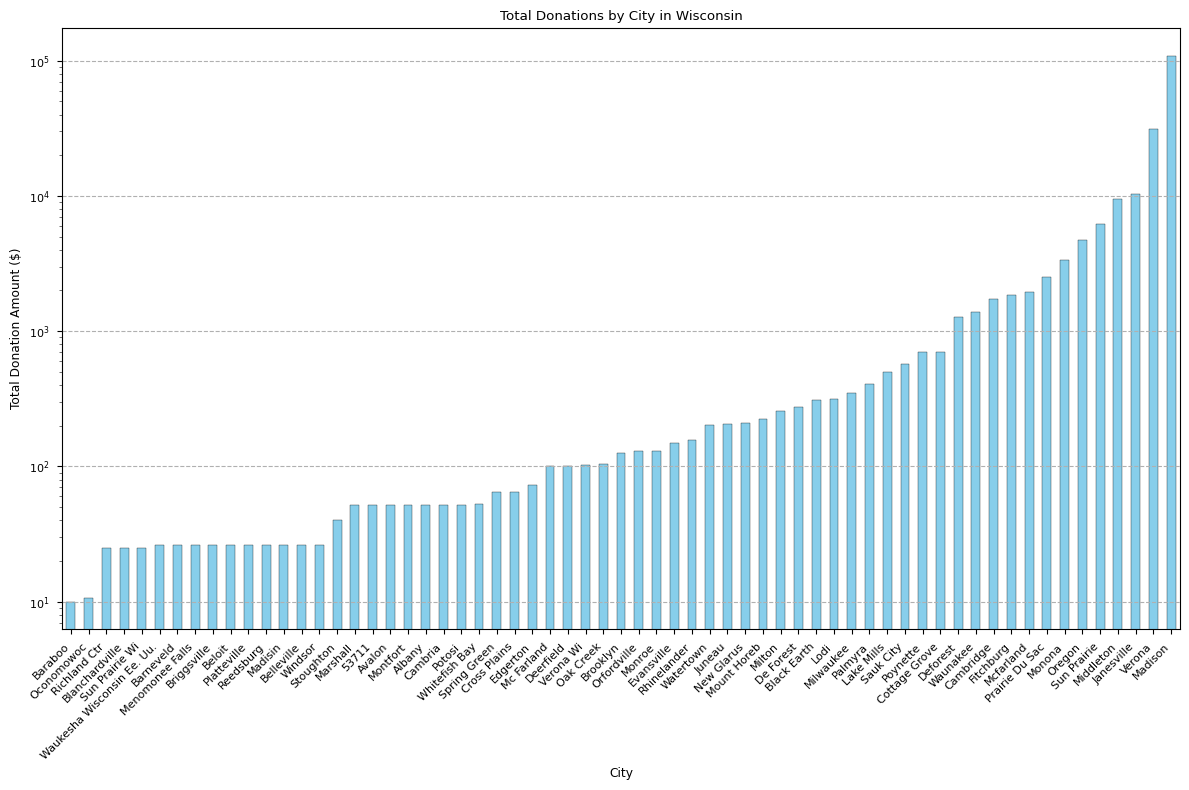

In [83]:
city_donations = (allDonorsWI.groupby('City')['Largest Donation Amount'].sum()).sort_values()

plt.figure(figsize=(12, 8))
city_donations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Donations by City in Wisconsin')
plt.xlabel('City')
plt.ylabel('Total Donation Amount ($)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--')  # Optional: add a grid for better readability
plt.show()